# Behind Back Propagation further explained
### Notes from 3Blue1Brown Series: https://www.youtube.com/watch?v=Ilg3gGewQ5U&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=4&t=0s

In [1]:
from IPython.display import Image
import sys
import numpy as np

In [2]:
path = "C:/Users/Luis/Anaconda3/"

### Intuition

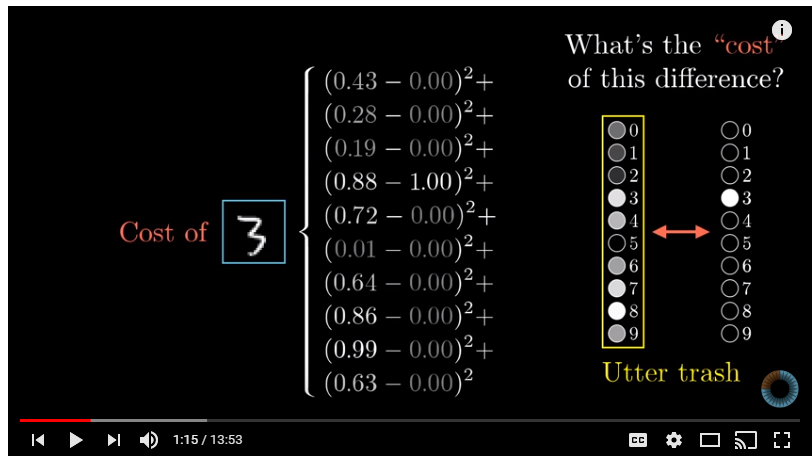

In [3]:
Image(filename = path + "Neural_net cost.png")

In [6]:
# cost is esentially the squared difference between predictions and actual values
# doing this for all your thousands of training examples and averaging the results
# gives you the total cost of network

# at first predictions are trash because weights are randomly initialized, but as
# the neural net adjusts they get closer to actual values

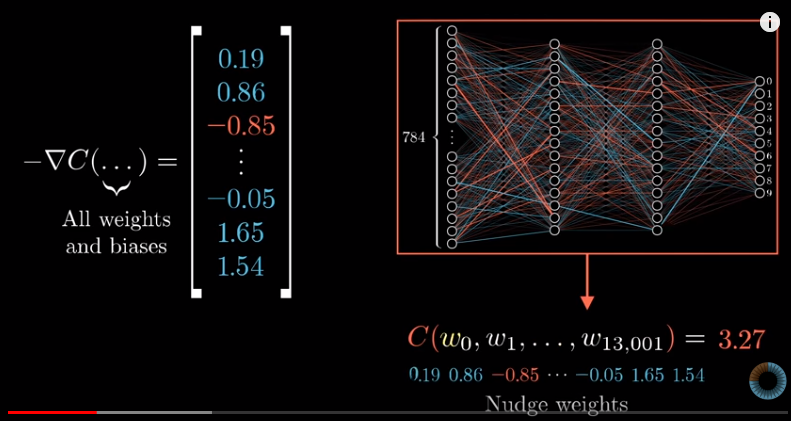

In [8]:
Image(filename = path + "gradient_of_cost.png")

In [9]:
# the thing we are looking for is the negative gradient of this cost function 
# which tells us how to change the weights and biases in the most effecient way to decrease the cost

In [10]:
# Back propgation is an algorithm for computing "crazy, complicated gradient"

In [11]:
# the gradient is the direction of steepest descent in cost function, but the magnitude of each 
# component also conveys how sensitve the cost function is to each weight and biass

#see example below

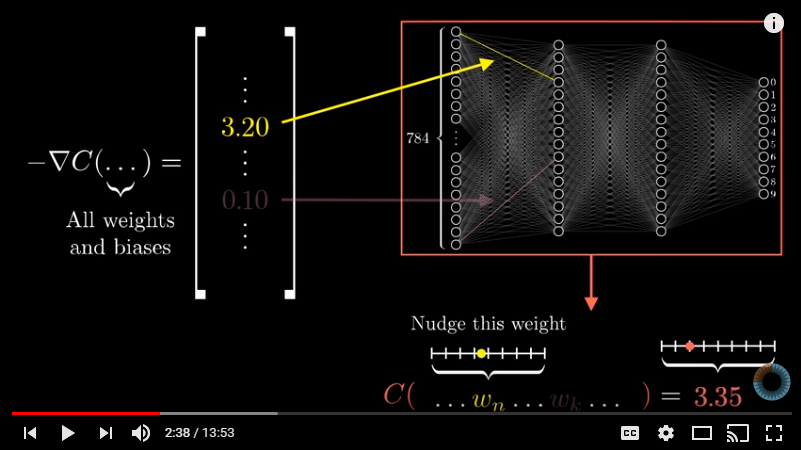

In [12]:
Image(filename = path + "component_sensitivity.png")

In [ ]:
# the yellow component associated with the link or weight is conveying that the cost function
# is 32 times more sensitive to the yellow weight than the purple weight

#if we nudge that weight just a little bit, it is going to have a 32 times
# greater impact on the cost function than the same nudge on the purple weight

##  example classifying a 2

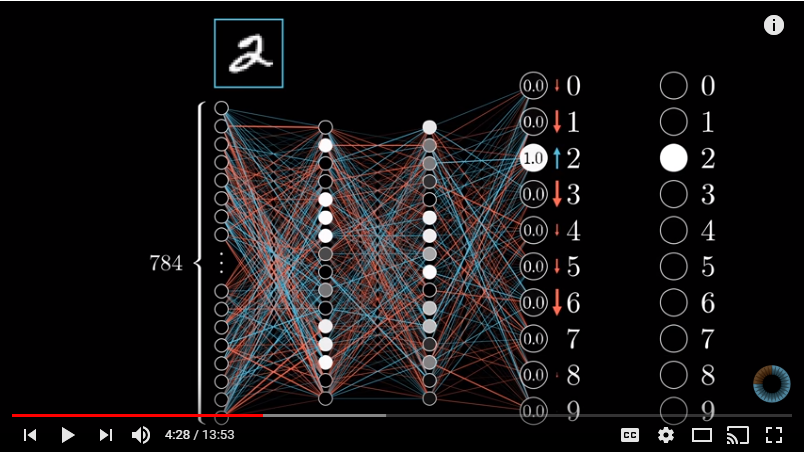

In [16]:
#what we wish our output to look like
Image(filename = path + "wishful.png")

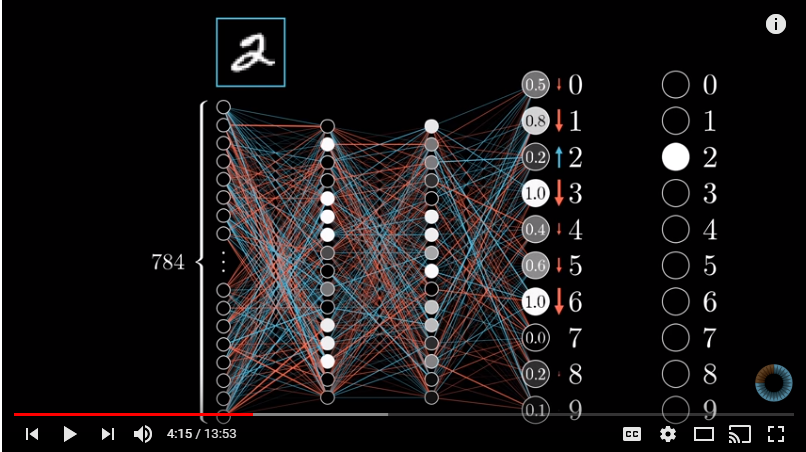

In [17]:
#what it starts off looking like
Image(filename = path + "reality.png")

In [18]:
# arrows show in what direction we want to adjust our output in order to reduce cost function 

In [19]:
# we want that output for 2 to get nudged up, while everything else to get nudged down

# ***** The size of the nudges for each output, should be porportional to how far away it
# currently is from its target value

# the increase to the 2 output (aka activation) is more important than the decrease to the 8 output 
# which is already pretty close to 0

### zooming in further: focusing on neuron for activation of 2

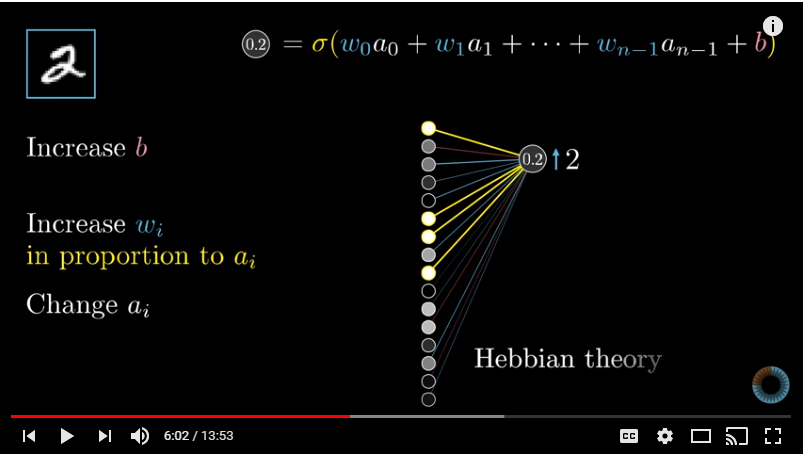

In [21]:
Image(filename = path + "representing.png")

In [22]:
# the sigmoid function that returns the weight for that neuron is loosely represented above

# this image is breaking down what feeds the neuron

# if we wish to increase the output we can do a number of different things
# - increase b (intercept or bias), increase weights (w) or increase the inputs (a)

# important to note that weights associated with lighter neurons increase output more 
# than the weights associated with dimmer neurons 


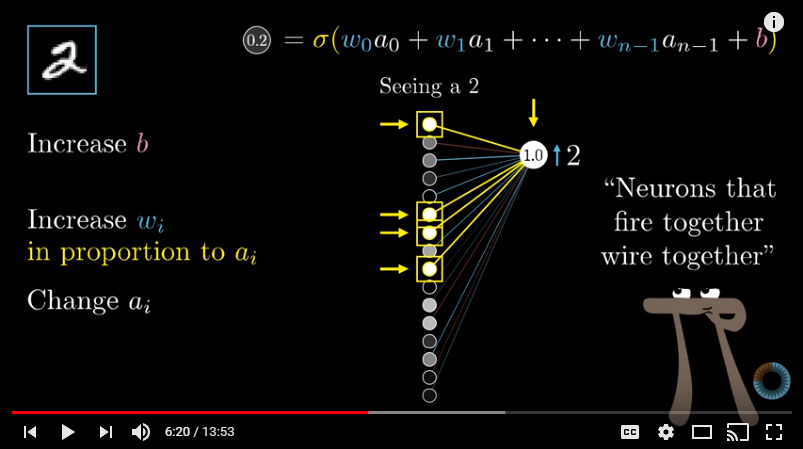

In [23]:
Image(filename = path + "fire.png")

In [24]:
# the biggest increases to weights, the biggest strengthening of connections happens with:
# - Neurons that are most active
# - Neurons we wish to become more active

# Neurons that are firing while seeing a 2, get more strongly linked than those firing when thinking
# about 2 

In [25]:
# Another way of increasing our sigmoid function or activation functiong ouput is increasing
# the inputs or activations in previous layer

# if every activation in previous layer connected with a positive weight got brighter
# and every activation in previous layer connected with negative weight got dimmer
# then our activation function output would increase (digit 2 neuron becomes more "active")

In [26]:
# you wanna change your inputs or activations in previos layer
# (a's) in porportion to size of the corresponding weights (because these
# are the ones with largest effect on final activation output and thus cost function)

# this makes the process of getting desired output more effecient

# keep in mind we cannot directly change the previous layer activations, we only have control
# over their weights and biases (but just as with the last output layer, but it is important to 
# note what those desired changes are)


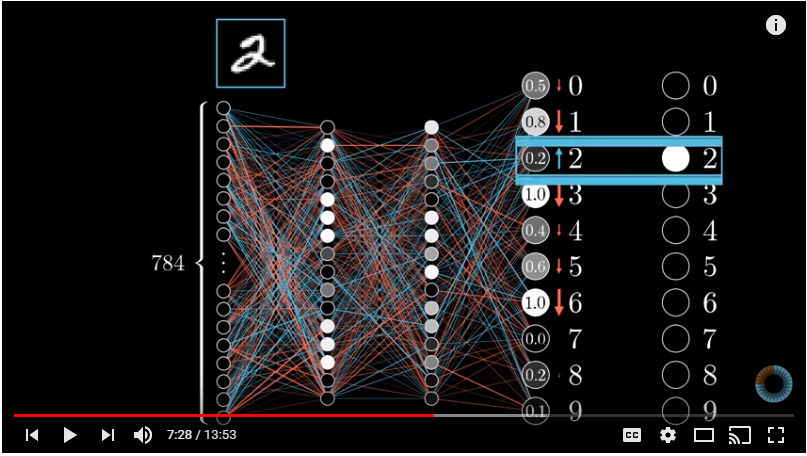

In [29]:
Image(filename = path + "inception.png")

In [30]:
# keep in mind we also want all other neurons (digits) in final layer (output) to be less active

# and each of those inputs (neurons), biases and weights in second to last layer
# feeding the output need to be adjusted differently in order to acheive DESIRED sigmoid 
# function output

# the desired output for digit 2 neuron is added together to the desired output for all other output
# digit neurons for what should happen in this previous layer (second to last layer)
# in proportion to corresponding weights and in proportion to how much each of those neurons (inputs)
# needs to change

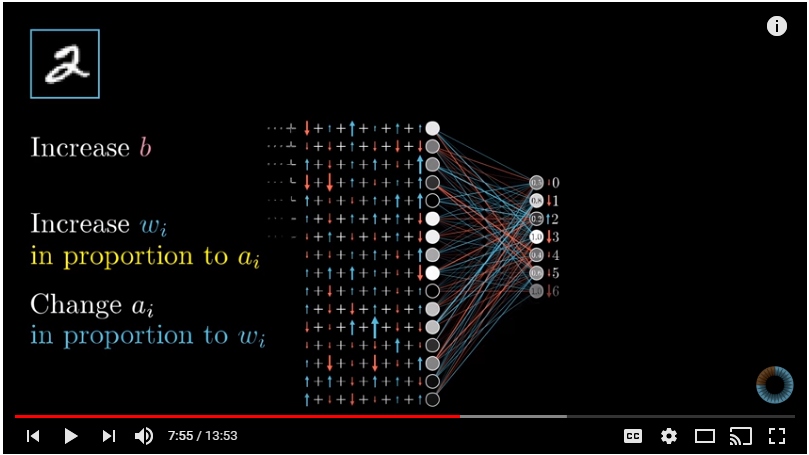

In [31]:
Image(filename = path + "aggregate.png")

In [32]:
# this is where the idea of propagating backwards comes
# by adding together all desired effects, you get list of nudges that you want to happen in 
# second to last layer

# once you get those, you can recursively apply the same process to the weights and biases 
# that determine those values aka activations aka inputs

# moving backwards through the network

In [33]:
# this is all how a single training example wishes to nudge each one of those weights and biases

# if we only listened to what that 2 wanted, the network would be incentivized to classify all 
# images as a 2

In [34]:
# we need to go through the same backprop routine for every other training example
# recording how each of them would like to change the weights and the biases
#and you average together those desired changes

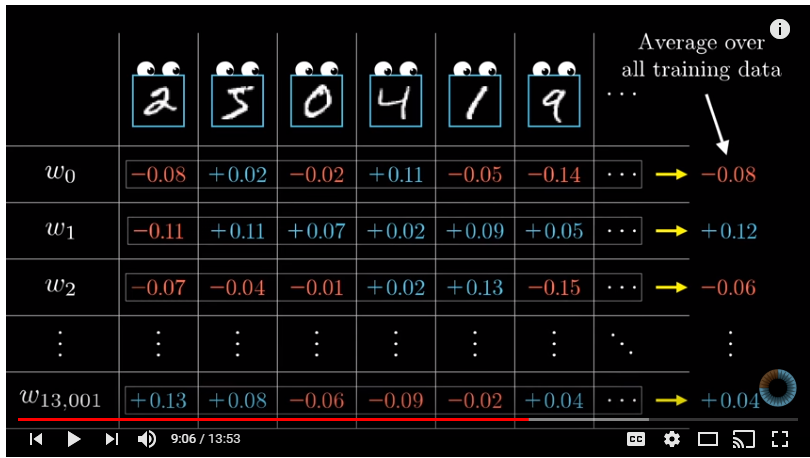

In [36]:
Image(filename = path + "training_for_all.png")

In [37]:
# this collection of average nudges to each weight and bias
# is loosely speaking, the negative gradient of the cost function

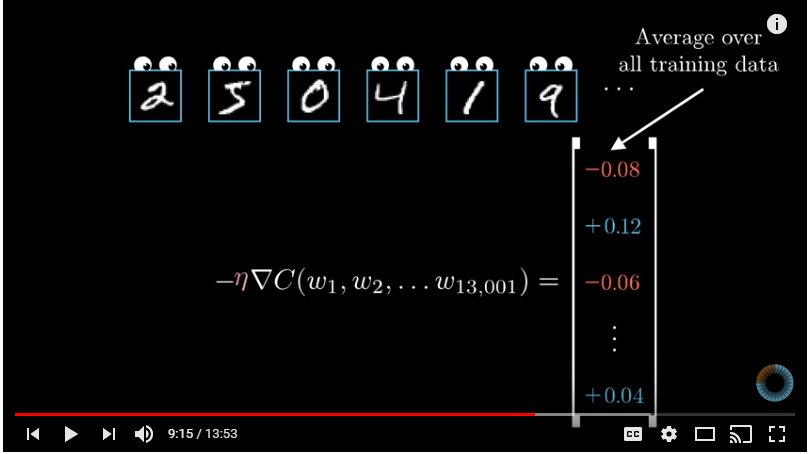

In [38]:
Image(filename = path + "negative_gradient.png")

In [39]:
# in practice it takes computers a long time to add up influence of every single training example
# in every single gradient descent step

#instead what is commonly done is a shuffle of training data which is then divided
# and ran in mini batches (each one having 100 training examples for example)

# then you compute a gradient descent step based on each mini batch

# not the most effecient step downhill because it is not taking into account entire data
# but it gives good approximation and saves much compute time

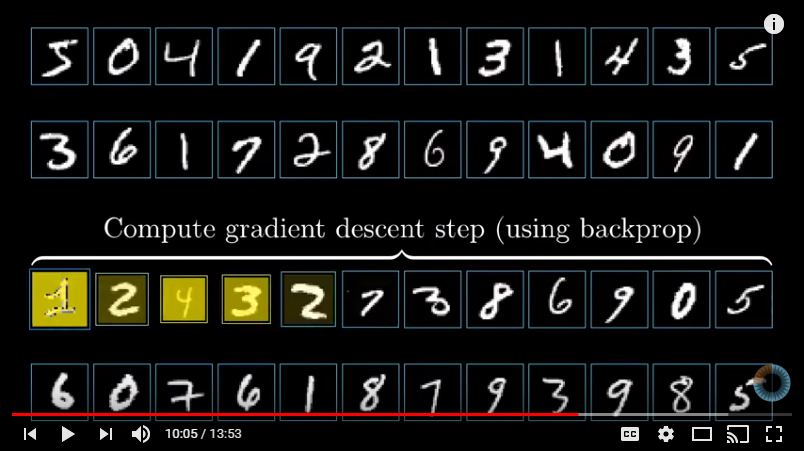

In [40]:
Image(filename = path + "stochastic_gradient.png")

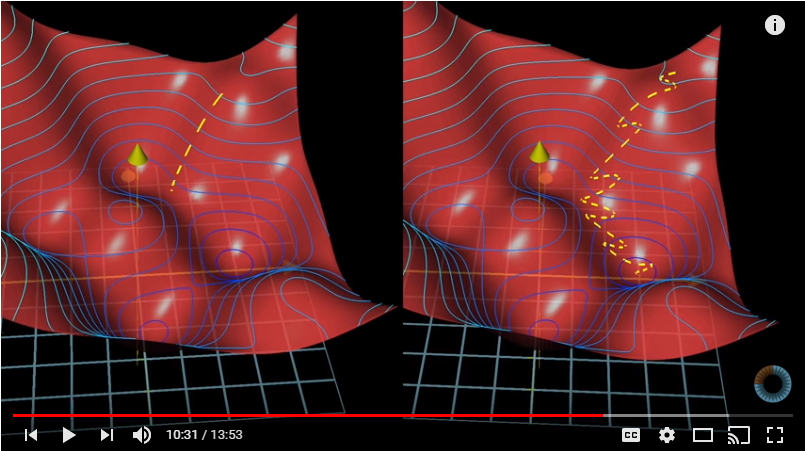

In [41]:
Image(filename = path + "stochastic_gradient vs actual gradient descent.png")

In [42]:
# actual gradient descent on left, stochastic gradient descent on the right

### Back propagation is the algorithm that determines how a single training example would like to nudge its weights and biases

In [43]:
## not just whether they should just go up or down, but also in terms what relative proportion to those
# changes cause the most rapid decrease in cost 

In [44]:
## for this algorithm to work, you need a lot of training data
## a common challenge in machine learning is just getting the labeled data you actually need

# Calculus

In [45]:
# let's start with a simple network
# one which each layer has a single neuron in it

#this network is determined by 3 weights and 3 biases
# our goal is to understand how sensitive the cost function is to these 
# variables, that way we know which adjustments to those terms are the most
# effecient in decreasing cost function

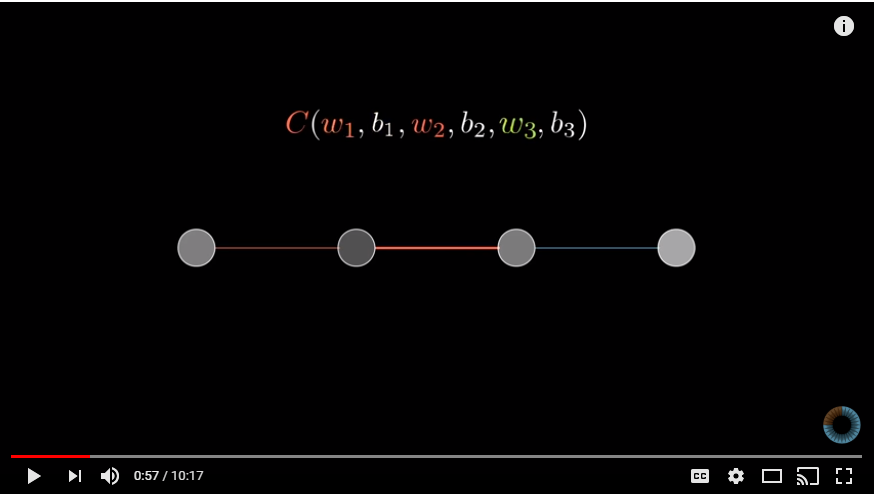

In [46]:
Image(filename = path + "simple_neural_net.png")

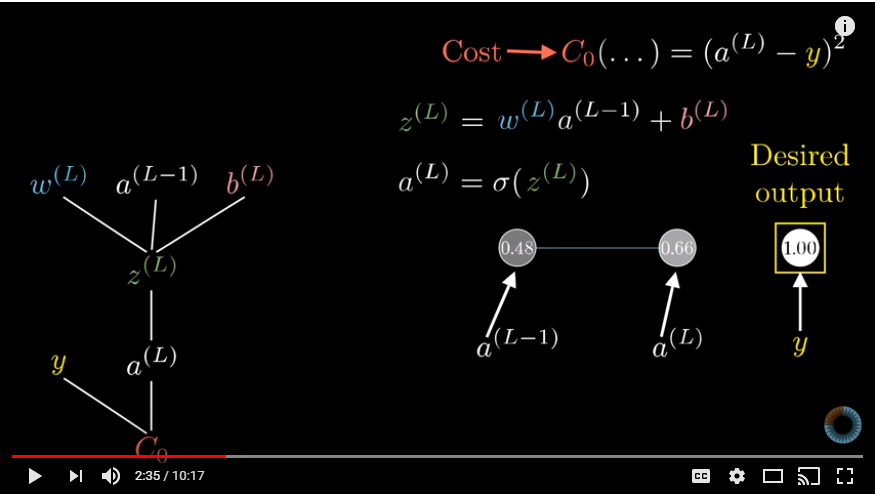

In [49]:
# we're just gonna focus on the connection between the last two neurons
Image(filename = path + "landscape.png")

In [50]:
# cost function for this network is (0.66 - 1.00)^2
# a(L) is compromised of weights and biases which map a(L-1) to a(L)
# we denote these weights, biases and a(L-1) as z(L)
# by putting z(L) in a sigmoid function we get a(L)
# which along with y allows us to calculate the cost function

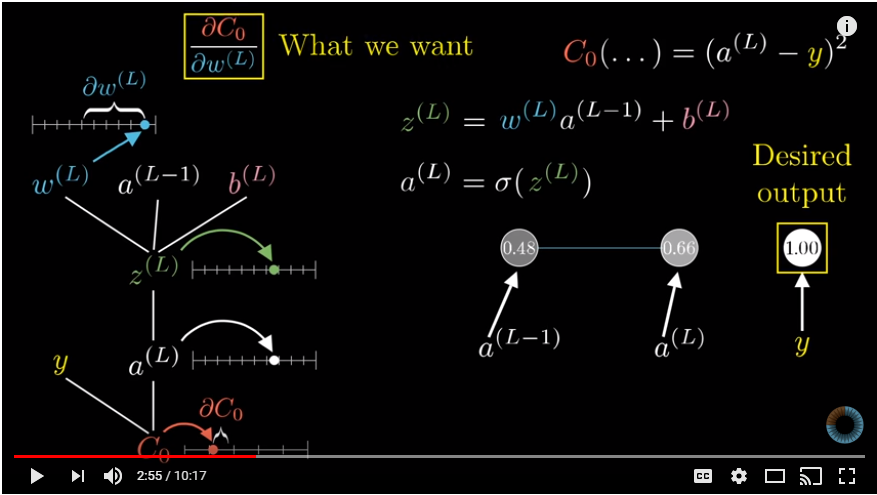

In [51]:
# our first goal is to understand how sensitive the cost function C is 
# to changes of weights w(L)
Image(filename = path + "first_step.png")


In [53]:
# this tiny nudge to w(L), causes a change in z(L)
# which then causes a change in a(L)
# which then causes a change to cost function C

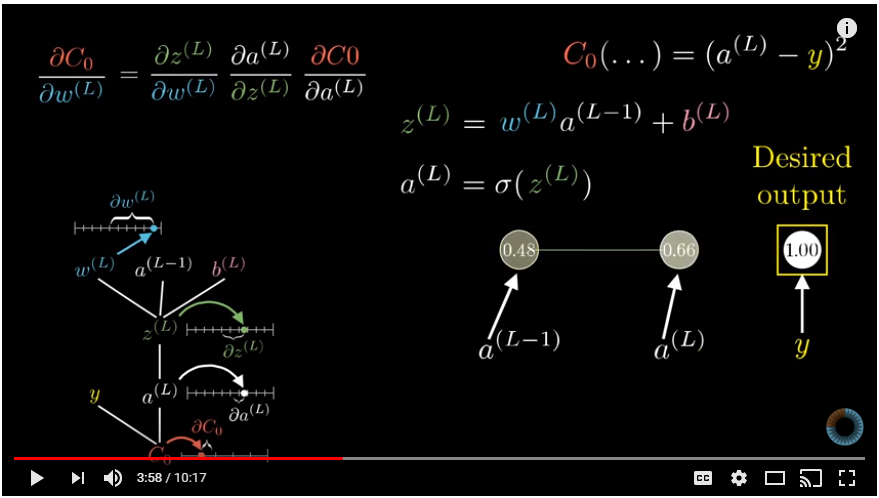

In [55]:
# breaking things up with mathematical notation at top of image

Image(filename = path + "chain_rule.png")

In [56]:
# we break things up by first looking at how
# z(L) changes when we nudge w(L) (which is the derivative of z(L),
# with respect to w(L))

# then we look at the following step which is how does a(L) change
# when we nudge z(L)

# and then finally we see how the cost function C changes when we 
# when we nudge a(L)

# this is the chain rule
# we multiply these three ratios to get the sensitivity of cost function (C)
# to changes to weights w(L)

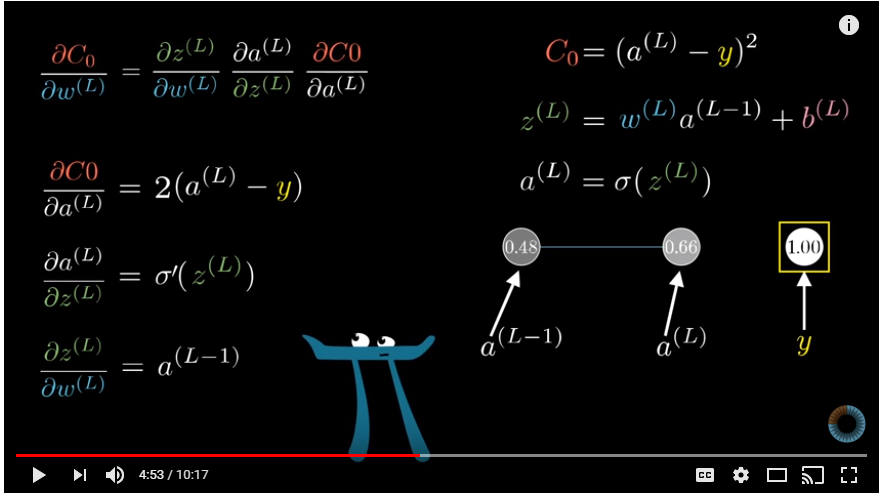

In [58]:
# now we are going to compute the relative derivatives
Image(filename = path + "derivatives.png")

In [59]:
# notice the derivative of C with respect to a(L) is proportional to how
# far away the a(L) output is from the desired output of y
# so if they were really far away, even slight changes to a(L) would have
# a large impact on cost function

# the derivative of a(L) with respect to z(L) is just the derivative of 
# sigmoid function or whatever non-linear function you use to output 
# weights and biases

# the derivative of z(L) with respect to w(L) comes out to be a(L-1) in this case
# the amount that small nudge to weight influenced the last layer a(L),
# depends on how strong the previous neuron is a(l-1), this is where neurons
# that fire together wire together comes from

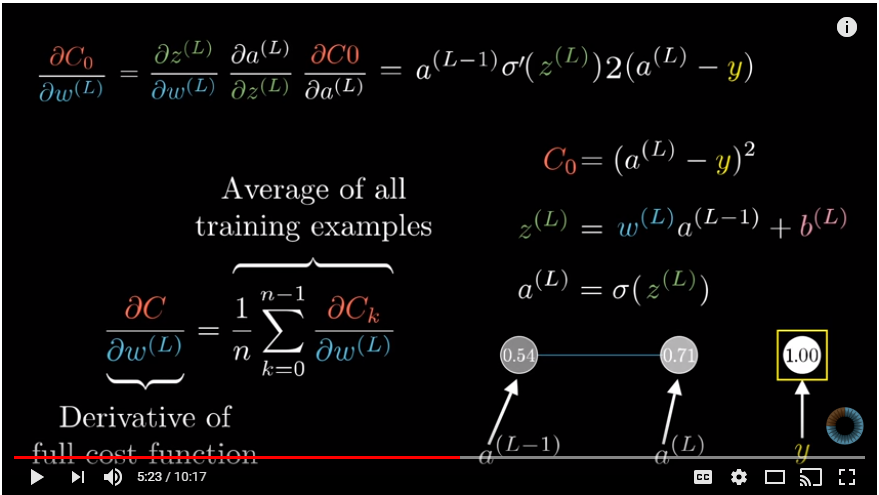

In [61]:
# all of this is the derivative of C with respect to w(L), only of the cost
# for a specific single training example
Image(filename = path + "average_over_all.png")

In [62]:
# since the full cost function requires averaging together cost across all 
# training examples, its derivative requires us to average this expression
# we found over all training examples

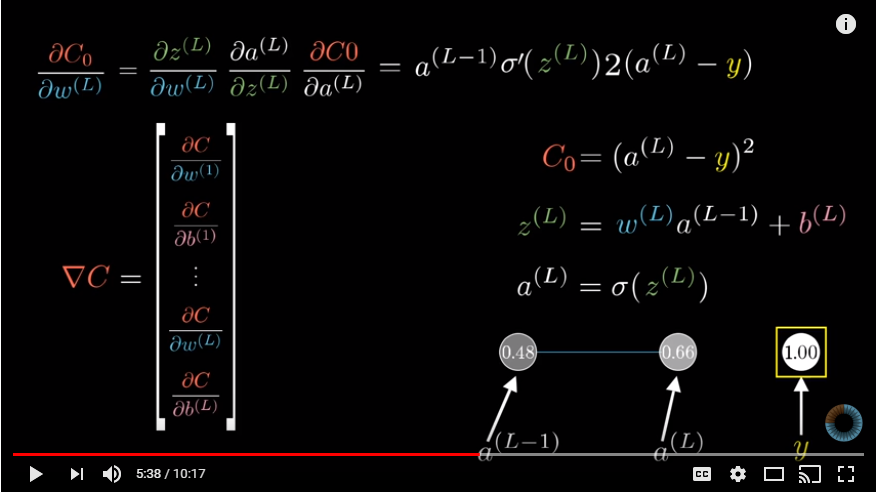

In [63]:
Image(filename = path + "gradient_vector.png")

In [64]:
# and that is just one component of the gradient vector, which itself is
# built up from the parital derivatives of the cost function with respect
# to all those weights and biases


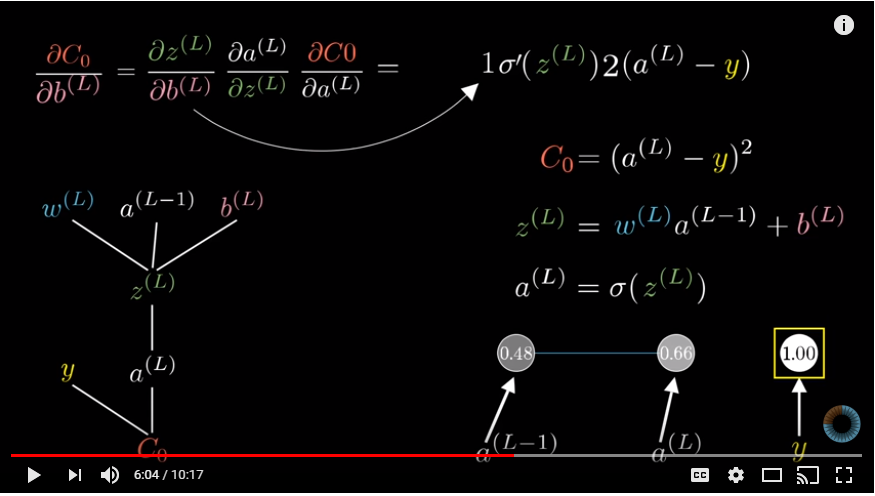

In [67]:
#even though that is just one of the many partial derivatives we need, 
# its more than 50% of the work
Image(filename = path + "bias_partial_derivative.png")

In [68]:
# the sensitivity to the bias for example is almost identical
# we just change denominator of derivaitve to be with respect to b(L) instead
# of w(L), which results in a partial derivative of a(L) with respect to 
# z(L) to be equal to 1

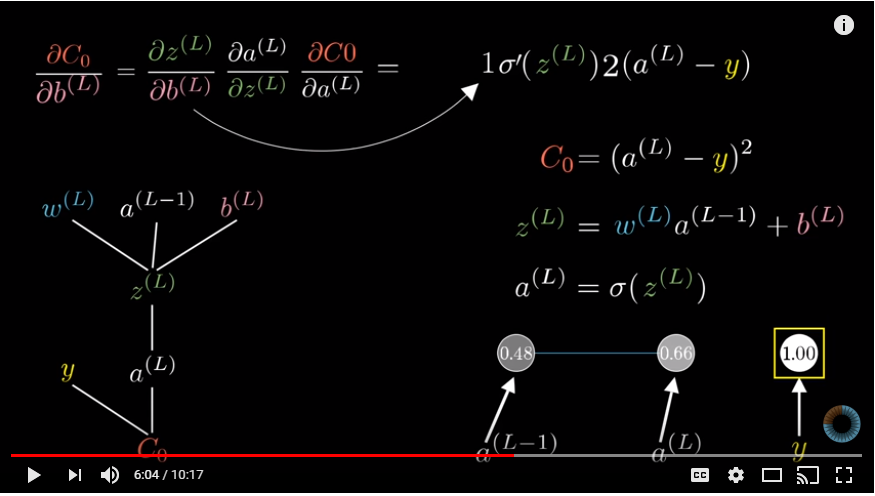

In [71]:
# we can also see how senstive cost function is to the activation in previous 
# layer a(L-1)
Image(filename = path + "bias_partial_derivative.png")

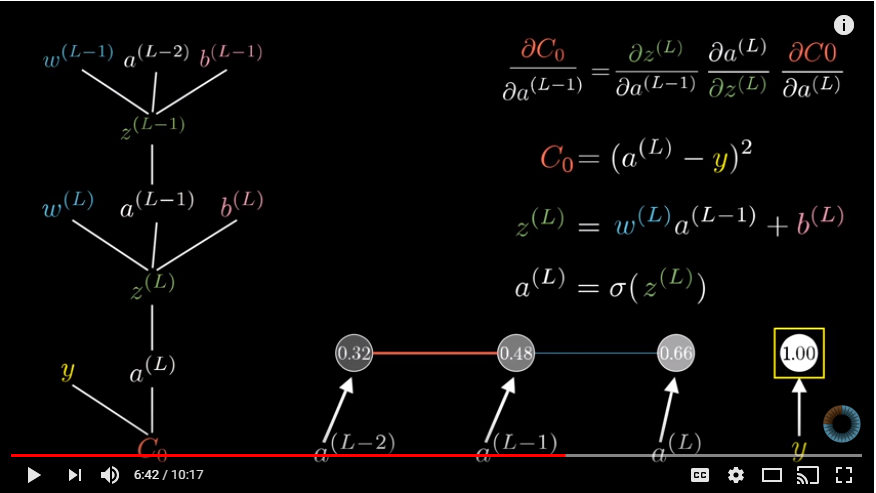

In [72]:
Image(filename = path + "back_prop_tree.png")

In [73]:
# and while we cannot chance a(L-1) directly, we can it see how it can be 
# changed by nudging its respective weights and biases
# this consequently allows us to see how the cost function is affected 
# by weights and biases of layer (L-1)
# we can recurisvely repeat this proces until we get to the raw input data
# (where idea behind back propagation comes from)

#once you know how sensitive cost function is to that previous layer a(L-1),
# you can just repeat the process for weights and biases feeding a(L-1)

# and that's pretty much it :)

In [74]:
# not that much changes when we have multiple neurons

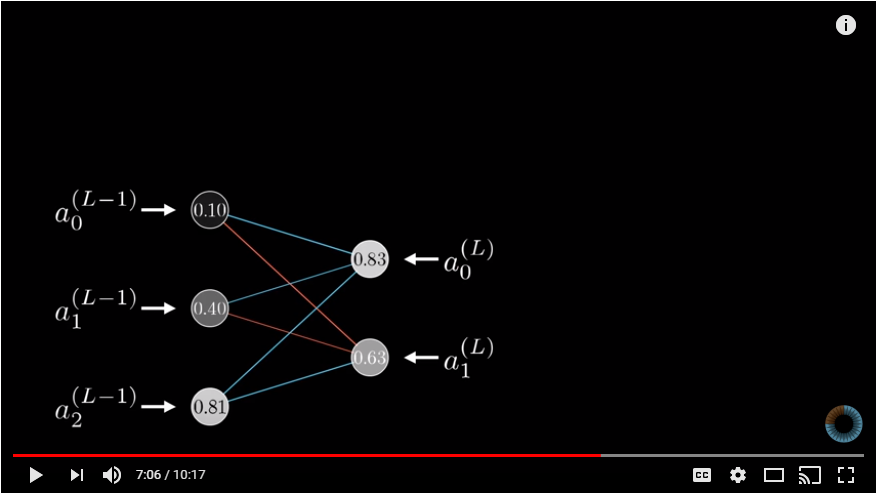

In [75]:
# a's in layers will have subscript to be able to identify which neuron 
# of that layer it is
Image(filename = path + "multi_neuron.png")

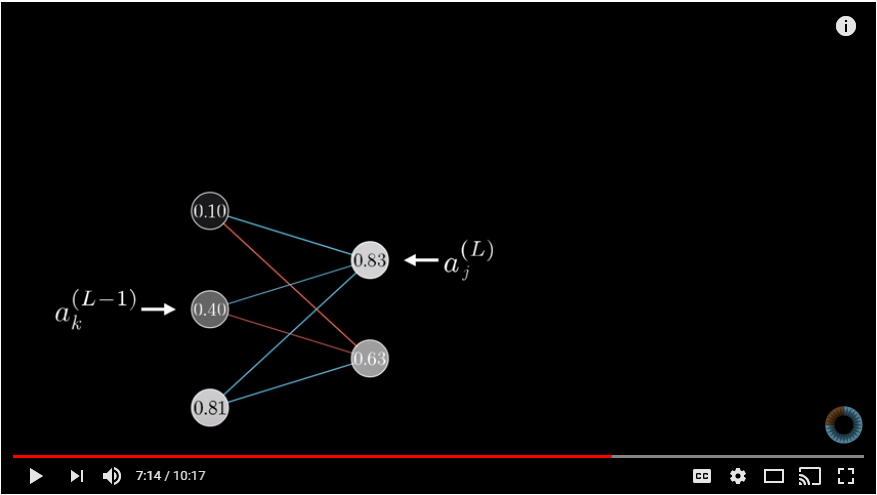

In [76]:
Image(filename = path + "index.png")
# k will index neurons in layer (l-1) and j will index neurons in layer (l)

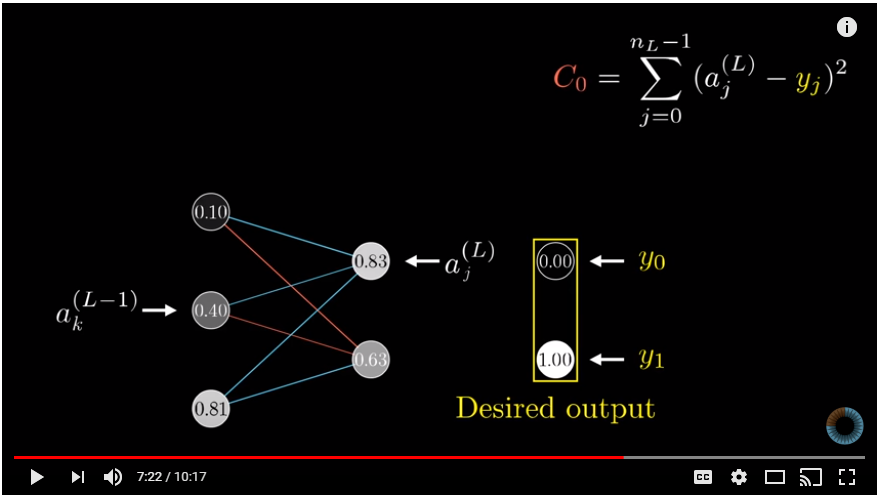

In [77]:
Image(filename = path + "cost_multi_neuron.png")

In [78]:
# add up squared of differences for all neurons in layer (l)

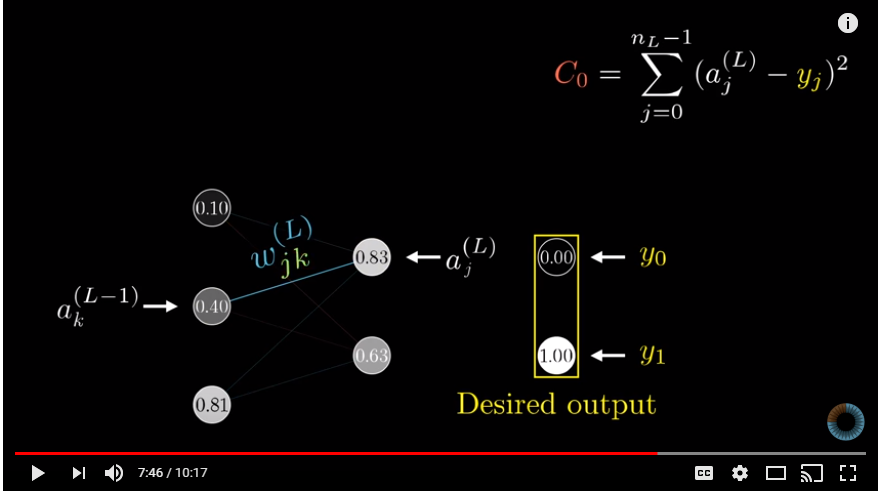

In [79]:
# there are a lot more weights, each one needs an index to keep track of 
Image(filename = path + "weight_index.png")

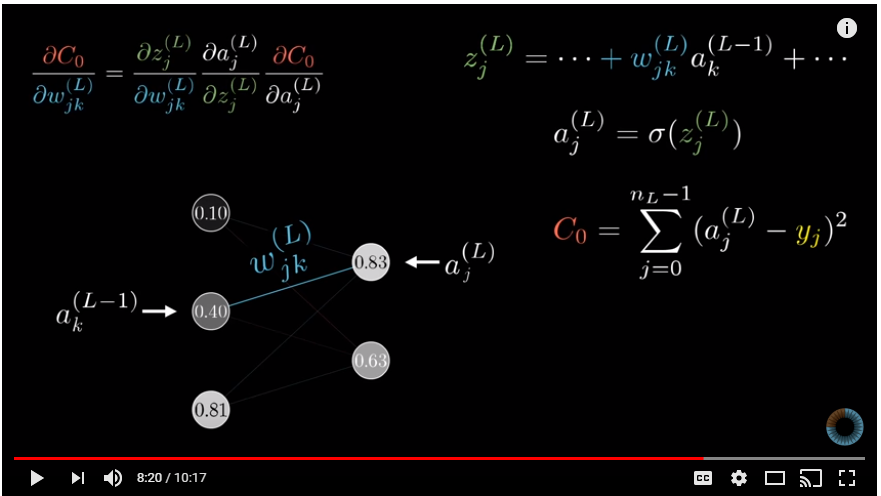

In [80]:
# previous chain rule aka backprop equations with relevant indexing
Image(filename = path + "indexed_equation.png")

In [81]:
# equations look essentially the same

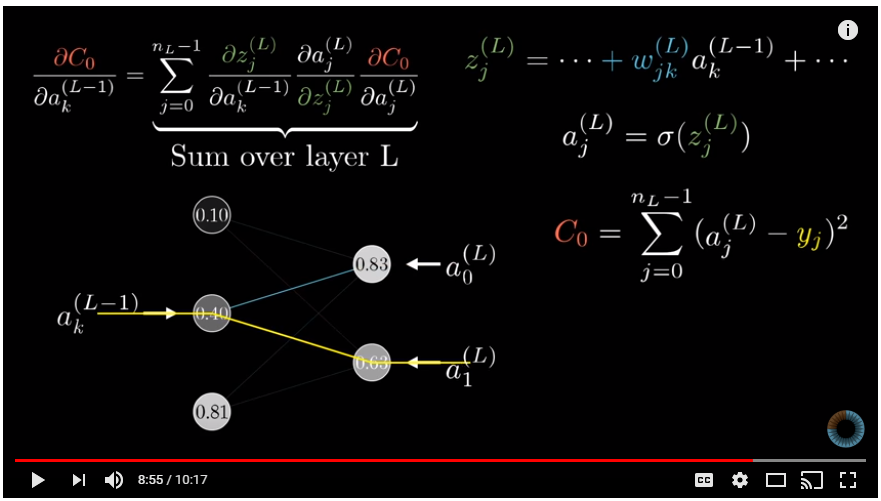

In [82]:
# what does change is that now the cost function's sensitivity to a neuron
# in a(L-1), the difference being that now a neuron influences the cost function
# through multiple differnt paths
# on one hand it influneces a0(l) and on another it influences a1(l), you
# have to add these up to determine how cost function changes when we change
# ak(l-1)
Image(filename = path + "final_backprop.png")

In [ ]:
# AND WE ARE DONE !!! 
# Thanks for reading through